In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor(-2., requires_grad=True)
x

tensor(-2., requires_grad=True)

In [3]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [4]:
y.backward()

In [5]:
x.grad.item()

-4.0

In [6]:
orig = list()
diff = list()

for i in np.linspace(-2, 2, 101):
    x = torch.tensor(i, requires_grad=True).float()
    y = x ** 3
    y.backward()
    
    orig.append(y.item())
    diff.append(x.grad.item())

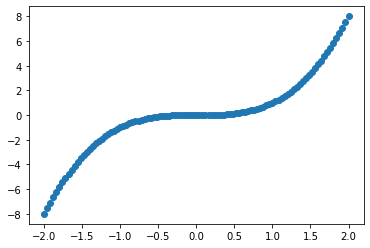

In [7]:
plt.scatter(np.linspace(-2, 2, 101), orig)

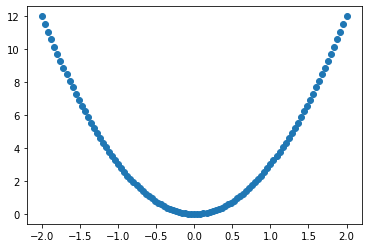

In [8]:
plt.scatter(np.linspace(-2, 2, 101), diff)

In [9]:
orig = list()
diff = list()
start = np.pi

for i in np.linspace(-2 * start, 2 * start, 101):
    x = torch.tensor(i, requires_grad=True).float()
    y = torch.sin(x)
    y.backward()
    
    orig.append(y.item())
    diff.append(x.grad.item())

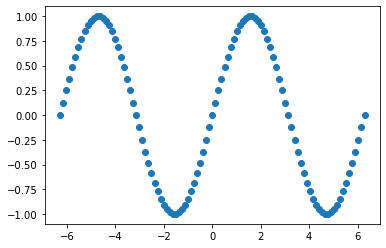

In [10]:
plt.scatter(np.linspace(-2 * start, 2 * start, 101), orig)

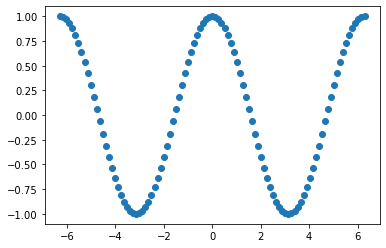

In [11]:
plt.scatter(np.linspace(-2 * start, 2 * start, 101), diff)

In [12]:
def plot_autograd(func, start, end, grid=101):
    
    grid = np.linspace(end, start, grid)
    orig = list()
    diff = list()

    for i in grid:
        x = torch.tensor(i, requires_grad=True).float()
        y = func(x)
        y.backward()

        orig.append(y.item())
        diff.append(x.grad.item())
        
    plt.plot(grid, orig, label='original')
    plt.plot(grid, diff, label='differential')
    plt.legend()

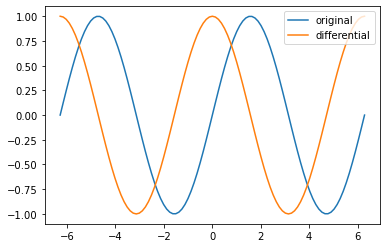

In [13]:
plot_autograd(torch.sin, -2 * np.pi, 2 * np.pi)

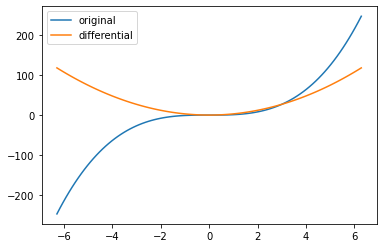

In [14]:
select_func = lambda x: x ** 3
plot_autograd(select_func, -2 * np.pi, 2 * np.pi)

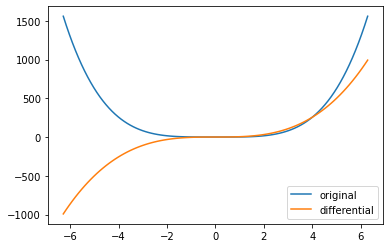

In [15]:
select_func = lambda x: x ** 4
plot_autograd(select_func, -2 * np.pi, 2 * np.pi)

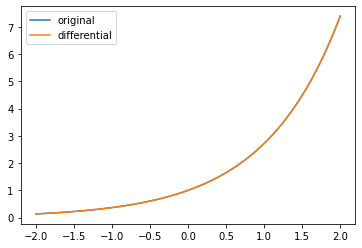

In [16]:
select_func = lambda x: torch.exp(x)
plot_autograd(select_func, -2, 2)

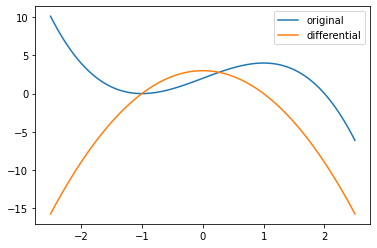

In [17]:
select_func = lambda x: (-x ** 3 + 3 * x + 2)
plot_autograd(select_func, -2.5, 2.5)

# Supplementary

In [18]:
x = torch.tensor(2.)
x

tensor(2.)

In [19]:
x.requires_grad_()
x

tensor(2., requires_grad=True)

In [20]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)
    
print(x.requires_grad)
print((x ** 2).requires_grad)

True
True
False
True
True


In [21]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)
